In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import random
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from gensim.models import word2vec
import re
from adjustText import adjust_text
from sklearn.metrics.pairwise import cosine_similarity

np.random.seed(40)

In [2]:
from multistop import Stopwords

sw = Stopwords()
sw.setlang(lang='chinese')

stopwords = sw.stopwords()
stopwords.update({"【","】","#","✺"," ",",","”","“","…","/"})

CLEANR = re.compile('<.*?>') 

set language to chinese


In [3]:
import csv
import jieba
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

DATA_PATH = "../reference/SexComment(1).csv"

def load_data(path):
    with open(path, "r", encoding="utf8") as f:
        reader = csv.reader(f, delimiter=',',)
        headers = next(reader)
        raw = [_ for _ in reader]
        return pd.DataFrame(raw, columns=headers)

df = load_data(path=DATA_PATH)

vectorizer = CountVectorizer(tokenizer=jieba.lcut)
vectorizer.fit(df["comment_text"])
vocab = pd.DataFrame.from_dict(vectorizer.vocabulary_, orient="index", columns=["index"])
vocab = vocab.sort_values("index")

X = vectorizer.transform(df["comment_text"]).toarray()
counts = np.sum(X, axis=0)

vocab.insert(1, "count", counts, allow_duplicates=True)
vocab = vocab.sort_values("count", ascending=False)

print(f"Bag of words: total {vocab.shape[0]} words")
print([x[0] for x in vocab[:400].iterrows() if x[0] not in stopwords])
freq_list = [x[0] for x in vocab[:400].iterrows() if x[0] not in stopwords]

/Users/charlie/opt/anaconda3/envs/stat/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ht/61mpnm095wn6wfstb5y27hsw0000gn/T/jieba.cache
Loading model cost 0.406 seconds.
Prefix dict has been built successfully.


Bag of words: total 27874 words
['女权', '女性', '没有', '一个', '觉得', '没', '男人', '女人', '男性', '男', '这种', '真的', '现在', '孩子', '女', '想', '知道', '社会', '问题', '骂', '应该', '不能', '男权', '极端', '可能', '很多', '姓', '结婚', '不会', '中国', '事', '里', '田园', '不要', '看到', '喜欢', '已经', '其实', '女生', '评论', '权利', '太', '微博', '平权', '平等', '性别', '支持', '真', '男女', '哈哈哈', '理解', '事情', '希望', '感觉', '认为', '一下', '需要', '确实', '生', '死', '婚姻', '法律', '找', '钱', '选择', '是不是', '搞', '之前', '生活', '关系', '东西', '粉丝', '真正', '意思', '一直', '话', '一定', '存在', '家暴', '尊重', '有人', '一点', '所谓', '爱', '以后', '?', '真是', '要求', '受害者', '工作', '只能', '不想', '看看', '女拳', '正常', '根本', '讨论', '群体', '男生', '国家', '吃', '离婚', '完全', '生育', '一种', '歧视', '个人', '愿意', '运动', '本来', '思想', '挺', '有点', '情况', '不好', '争取', '一起', '家庭', '肯定', '直接', '行为', '这是', '逻辑', '关注', '女儿', '驴', '懂', '女孩', '反对', '观点', '说话', '世界', '现实', '高', '带', '恶心', '屌', '反', '一句', '难道', '听', '>', '发声', '代表', '站', '出', 'username', '<', '比较', '毕竟', '自由', '父母', '妈', '伤害', '是因为', '最后', '朋友', '想要', '讲', '美国', '不同', '性骚扰', '好像', '特别', '走', 

In [4]:
len(freq_list)

229

In [5]:
font_dir = ["."]
for font in fm.findSystemFonts(font_dir):
    fm.fontManager.addfont(font)

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

/Users/charlie/opt/anaconda3/envs/stat/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/charlie/opt/anaconda3/envs/stat/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


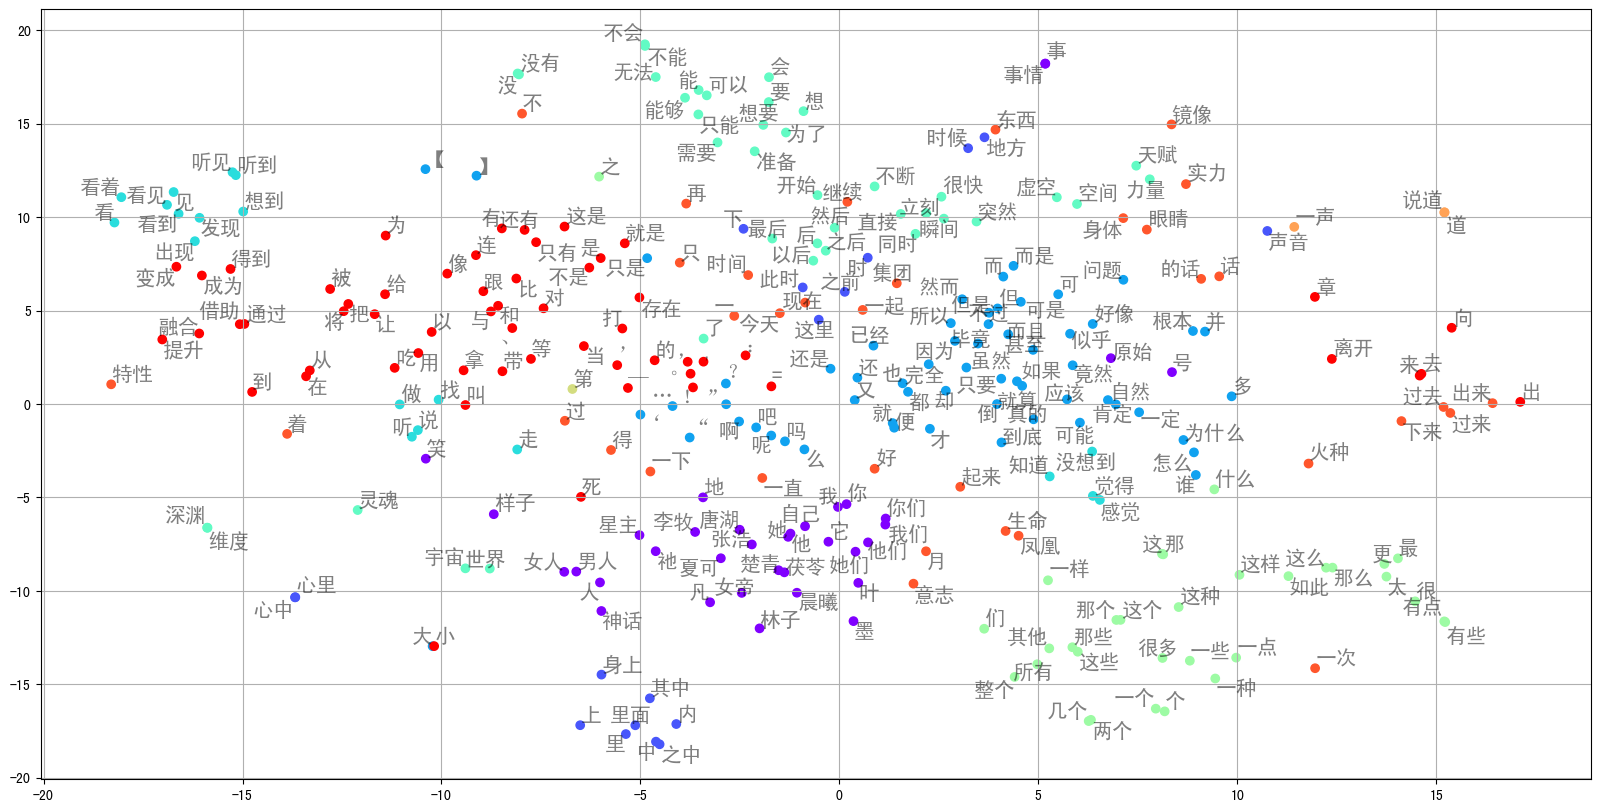

In [6]:
file_path = "./word2vec.txt"

X, Y = list(), list()

with open(file_path, "r", encoding="utf8") as f:
    line = f.readline()
    for i in range(0, 300):
        line = f.readline().split()
        Y.append(line[:1])
        X.append(line[1:])

k = 10
y_pred = KMeans(n_clusters=k, random_state=9).fit_predict(X)
colors = cm.rainbow(np.linspace(0, 1, k))
y_color = [colors[y] for y in y_pred]

X_std = StandardScaler().fit_transform(X) 
tsne = TSNE(n_components=2) 
X_tsne = tsne.fit_transform(X_std)


plt.figure(figsize=(20, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_color)
plot_text_list = []
for i, word in enumerate(Y):
    plot_text_list.append(plt.text(X_tsne[i, 0], X_tsne[i, 1], word[0], size=15, alpha=0.5))
adjust_text(plot_text_list, precision=0.8, lim=20)
plt.grid(True)
#     plt.annotate(word[0], alpha=0.5, xy=(X_tsne[i, 0], X_tsne[i, 1]), xytext=(5, 2), 
#                  textcoords='offset points', ha='right', va='bottom', size=15)

/Users/charlie/opt/anaconda3/envs/stat/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/charlie/opt/anaconda3/envs/stat/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(-58.5610767364502, 66.18458137512206, -74.53671760559082, 67.43768043518067)

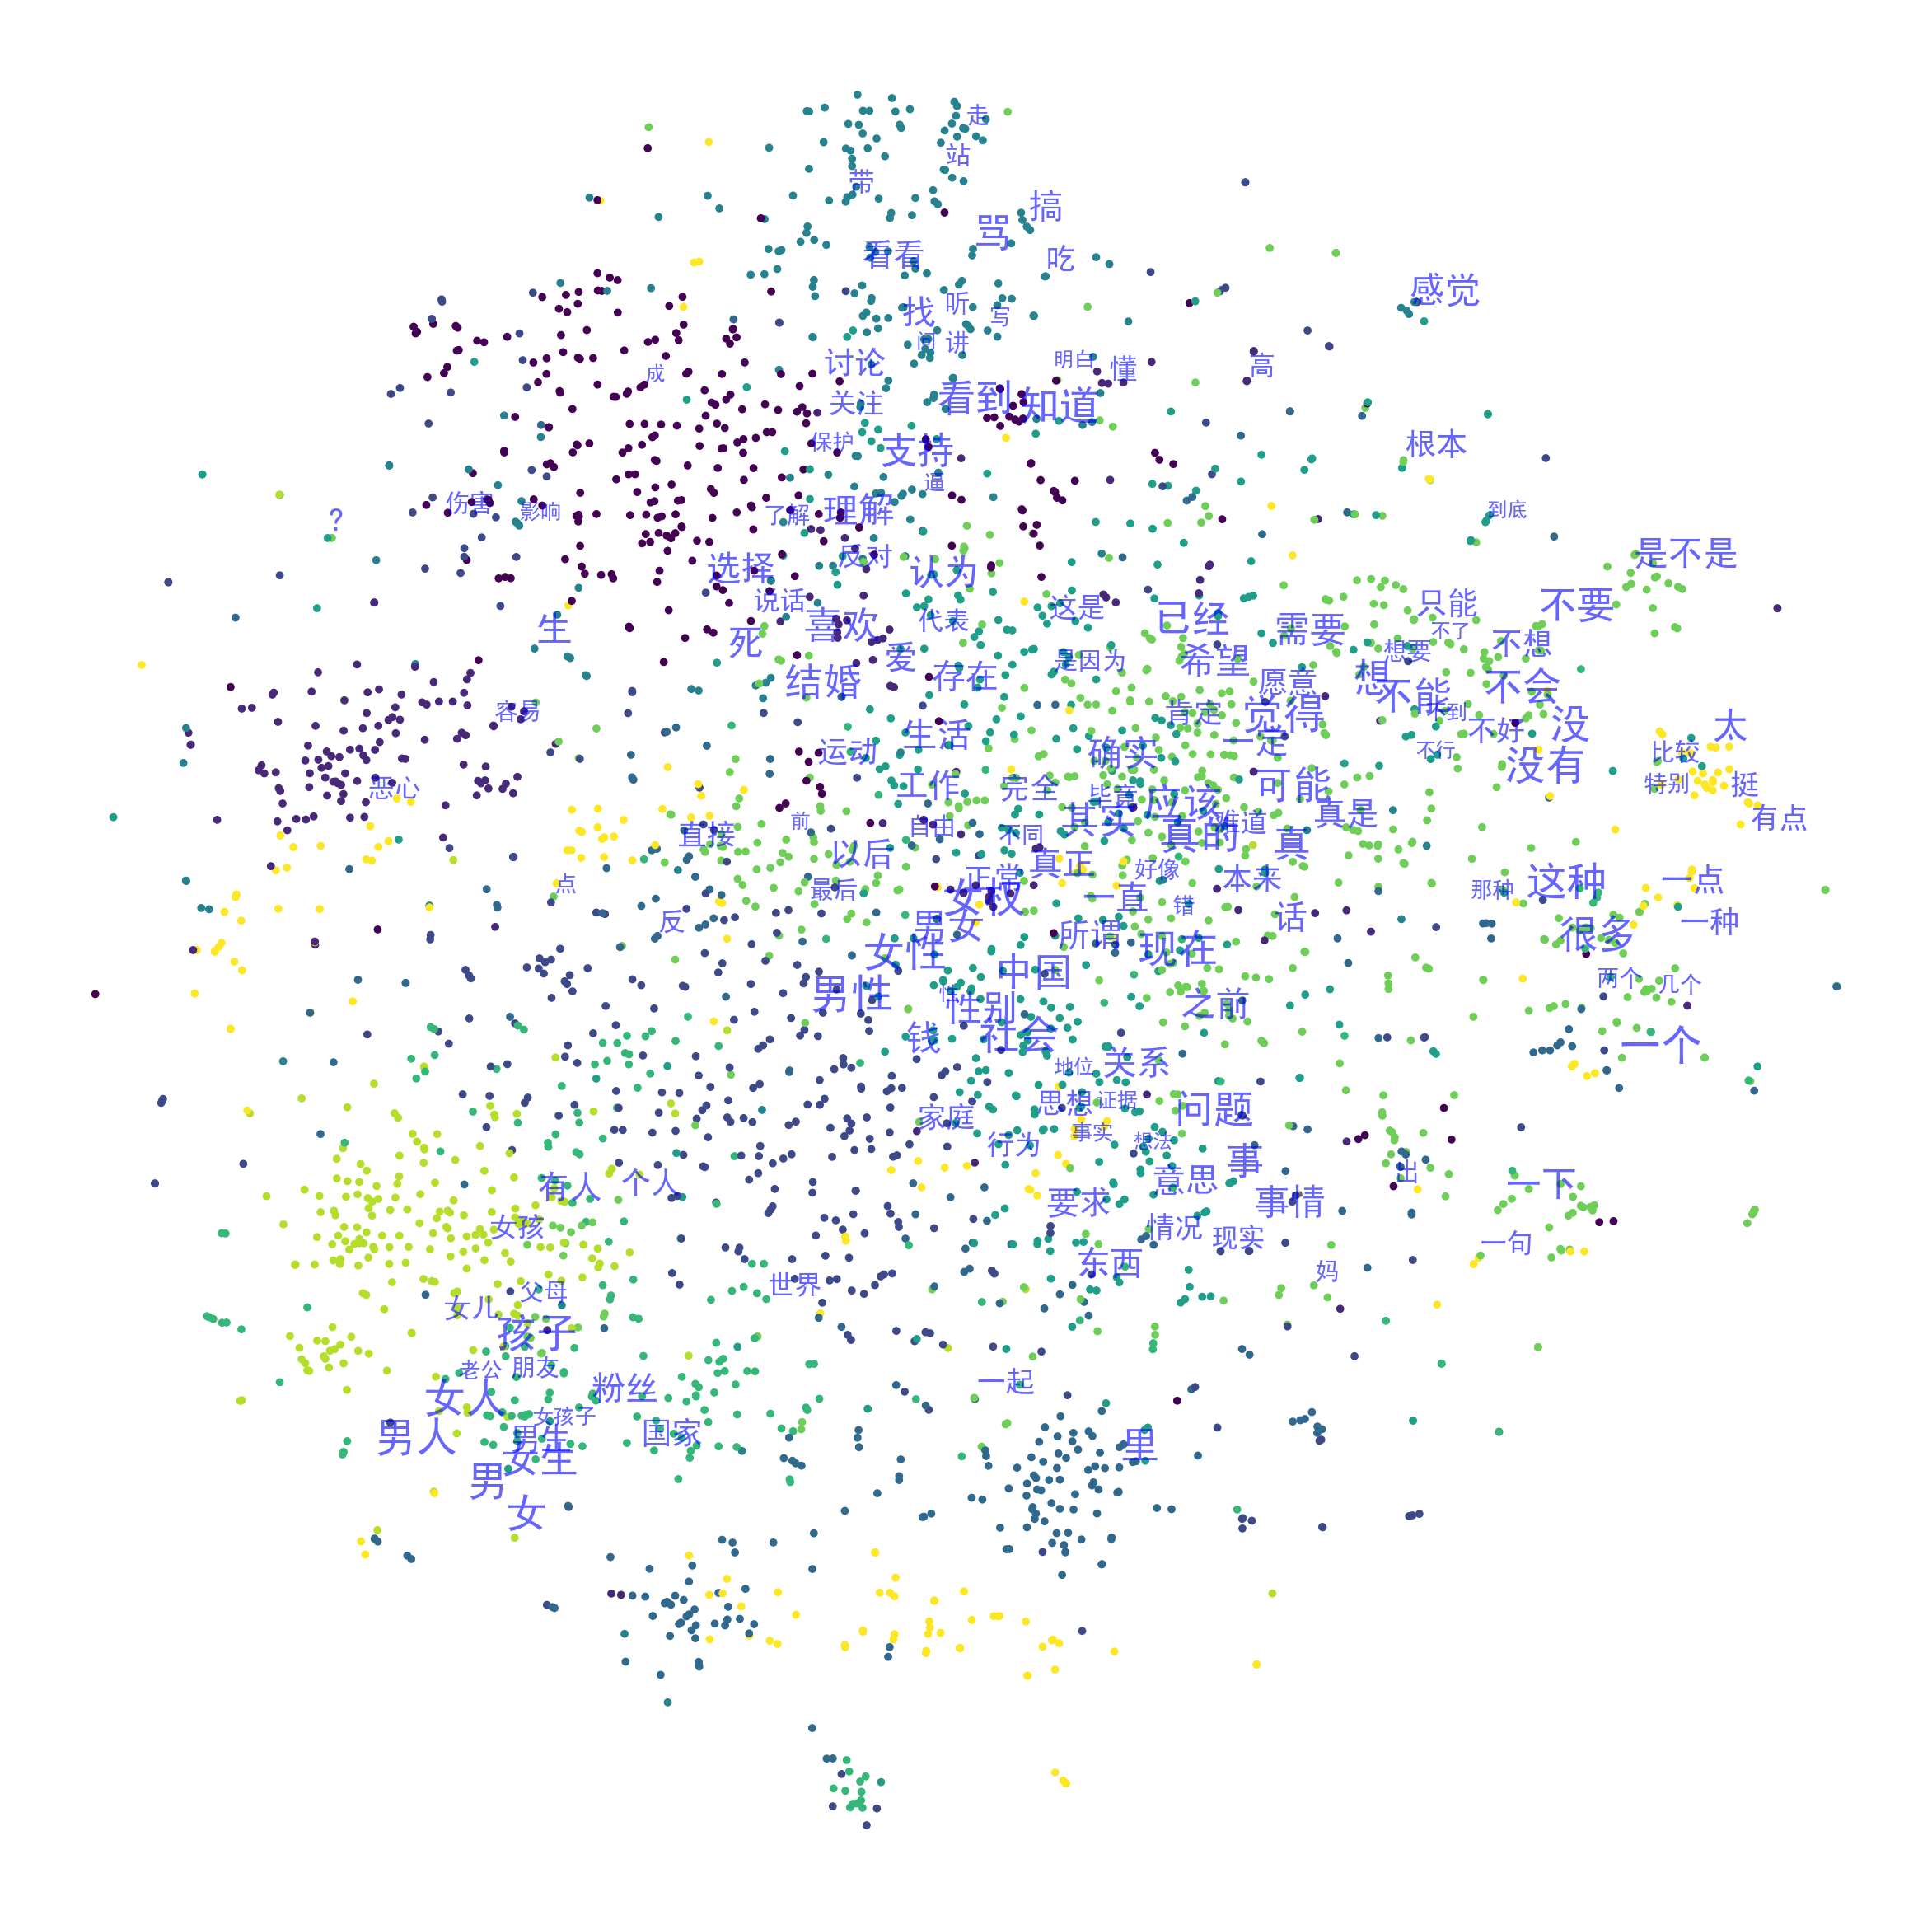

In [7]:
file_path = "./word2vec.txt"

X, Y = list(), list()

with open(file_path, "r", encoding="utf8") as f:
    line = f.readline()
    for i in range(3000):
        line = f.readline().split()
        Y.append(line[:1])
        X.append(line[1:])

k = 10
y_pred = KMeans(n_clusters=k, random_state=9).fit_predict(X)
colors = cm.rainbow(np.linspace(0, 1, k))
y_color = [colors[y] for y in y_pred]

X_std = StandardScaler().fit_transform(X) 
tsne = TSNE(n_components=2) 
X_tsne = tsne.fit_transform(X_std)


plt.figure(figsize=(30, 30))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred)
plot_text_list = []
for i, word in enumerate(Y):
    if word[0] in freq_list[:200]:
        t = int(15+(len(freq_list)-freq_list.index(word[0]))/10)
        plot_text_list.append(plt.text(X_tsne[i, 0], X_tsne[i, 1], word[0], size=t, color="b", alpha=0.6))
adjust_text(plot_text_list, precision=0.3)
plt.axis('off')
#         plt.annotate(word[0], alpha=0.6, xy=(X_tsne[i, 0], X_tsne[i, 1]), xytext=(5, 2), 
#                  textcoords='offset points', ha='right', va='bottom', size=t, color="b")

In [8]:
file_path = "../reference/tencent-ailab-embedding-zh-d100-v0.2.0-s/tencent-ailab-embedding-zh-d100-v0.2.0-s.txt"
# file_path = "./word2vec.txt"

X, Y = list(), list()

with open(file_path, "r", encoding="utf8") as f:
    line = f.readline()
    for i in range(2000):
        line = f.readline().split()
#         if line[0] in freq_list:
        Y.append(line[:1])
        X.append(line[1:])

In [9]:
y_pred = KMeans(n_clusters=20, random_state=9).fit_predict(X)

In [10]:
X_std = StandardScaler().fit_transform(X) 
tsne = TSNE(n_components=2) 
X_tsne = tsne.fit_transform(X_std)

/Users/charlie/opt/anaconda3/envs/stat/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/charlie/opt/anaconda3/envs/stat/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


4

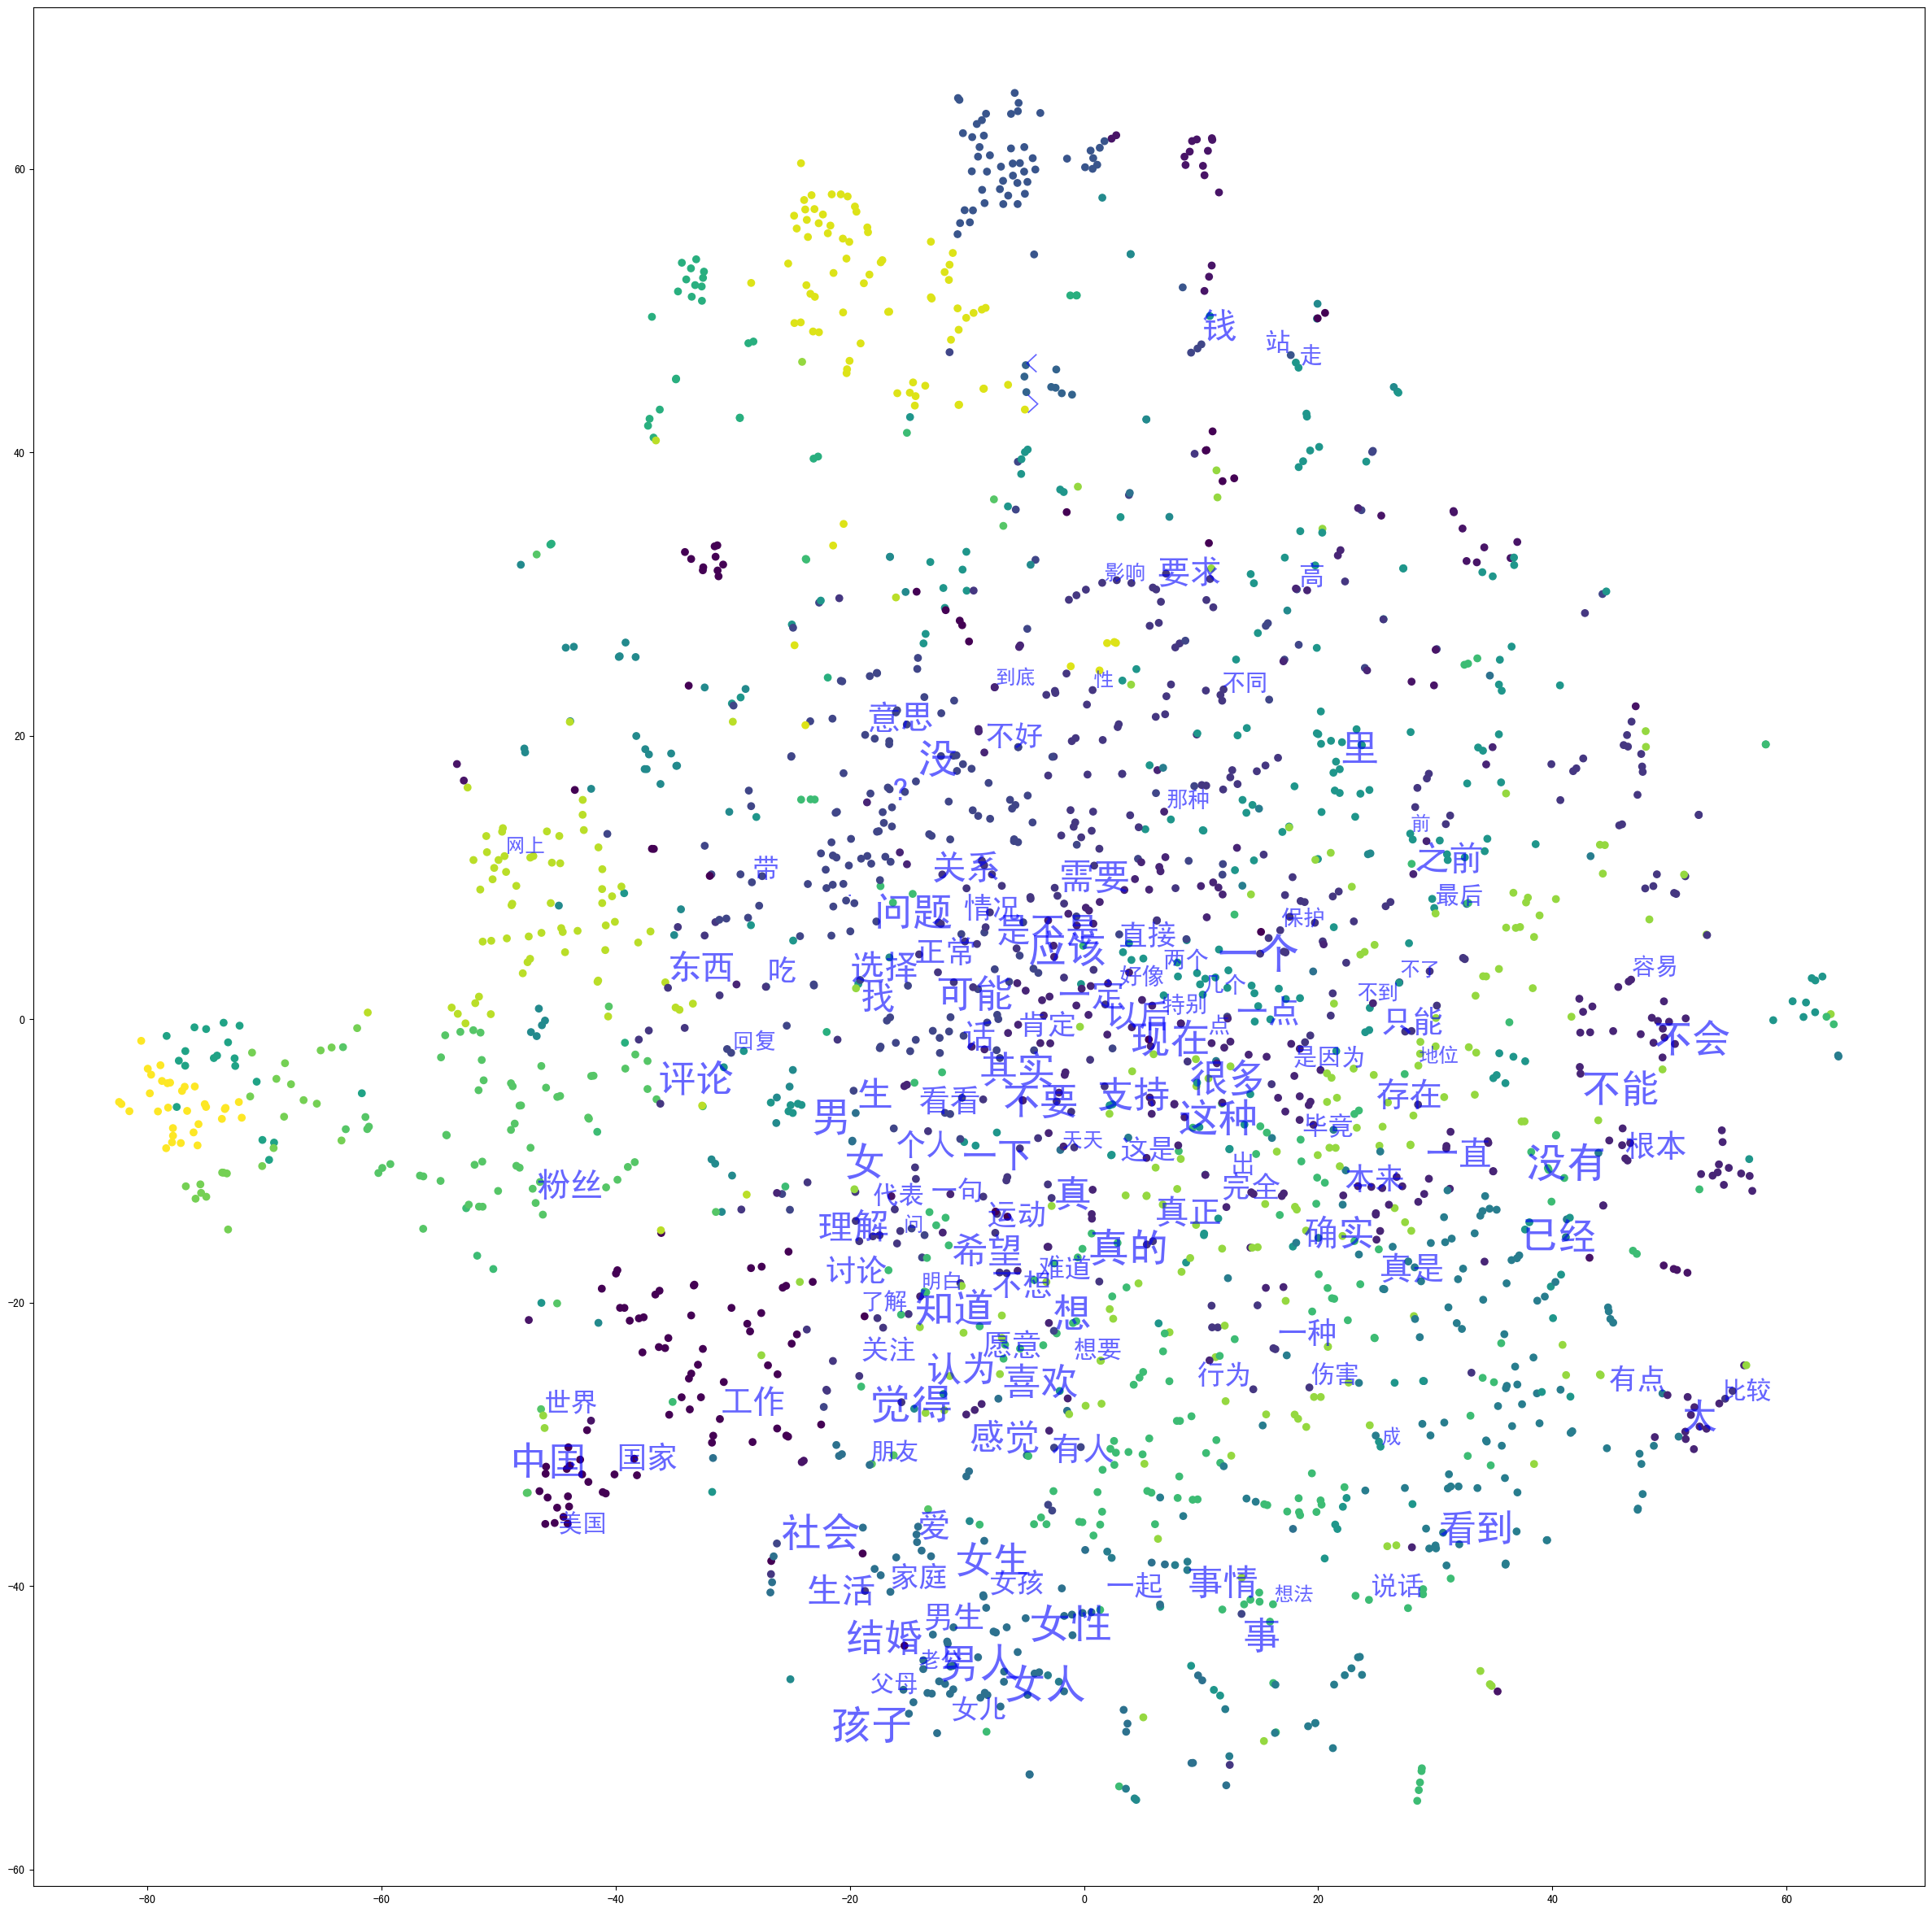

In [11]:
plt.figure(figsize=(30, 30))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred)
plot_text_list = []
for i, word in enumerate(Y):
    if word[0] in freq_list[:200]:
        t = int(15+(len(freq_list)-freq_list.index(word[0]))/10)
        plot_text_list.append(plt.text(X_tsne[i, 0], X_tsne[i, 1], word[0], size=t, color="b", alpha=0.6))
adjust_text(plot_text_list, precision=0.3)

/Users/charlie/opt/anaconda3/envs/stat/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/charlie/opt/anaconda3/envs/stat/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/Users/charlie/opt/anaconda3/envs/stat/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


(-80.0, 80.0)

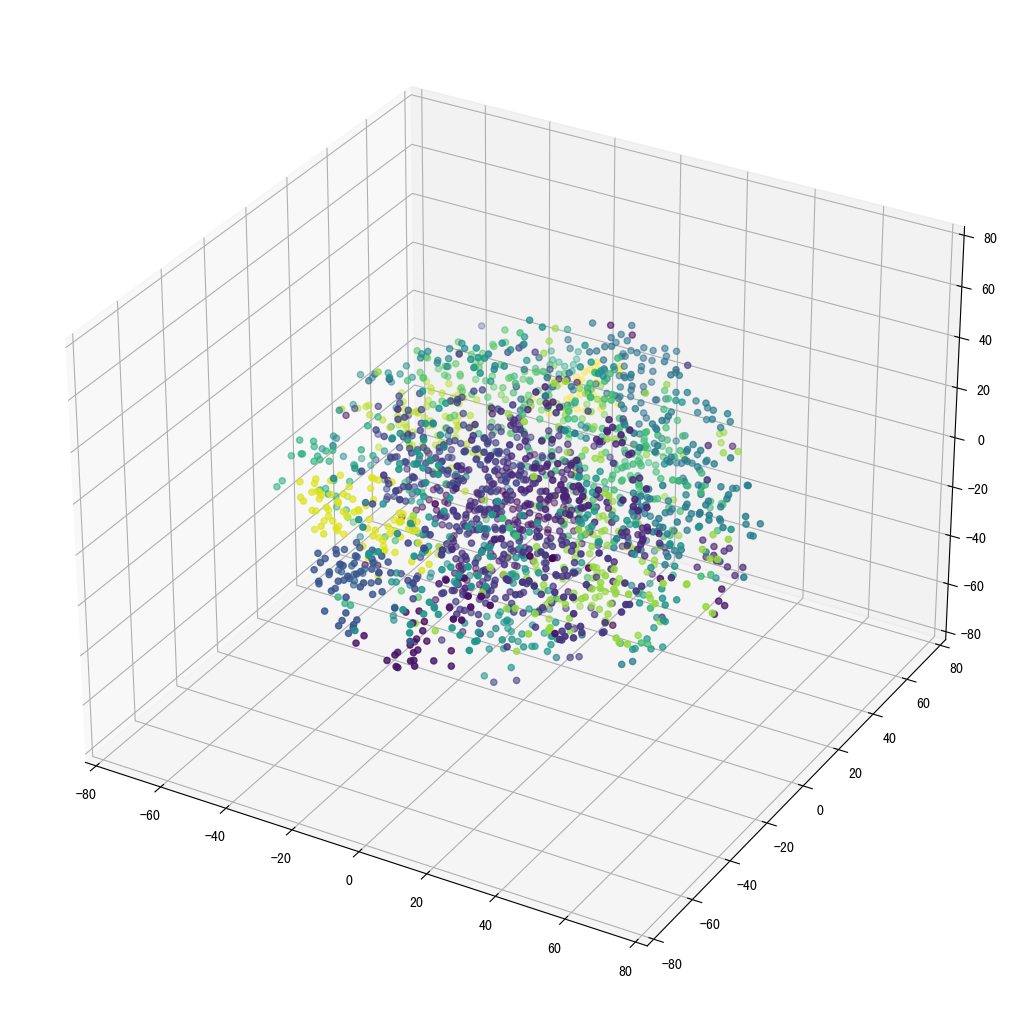

In [12]:
tsne = TSNE(n_components=3) 
X_tsne = tsne.fit_transform(X_std) 

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c = y_pred)

ax.set_xlim(-80, 80)
ax.set_ylim(-80, 80)
ax.set_zlim(-80, 80)

In [13]:
model = word2vec.Word2Vec.load('./word2vec_model/word2vec.model')
input_word_list = freq_list[:10]

vec_list = []
for word in input_word_list:
    vec_list.append(model.wv[word])
result = cosine_similarity(vec_list, vec_list)

In [14]:
sim_df = pd.DataFrame(result)
sim_df.columns = input_word_list
sim_df.index = input_word_list
sim_df.round(2)
sim_df

,女权,女性,没有,一个,觉得,没,男人,女人,男性,男
女权,1.000000,0.365455,0.081493,0.192606,0.029105,0.039743,0.196285,0.288102,0.325675,0.272231
女性,0.365455,1.000000,0.167535,0.085395,-0.090866,0.035424,0.470894,0.428719,0.821846,0.300466
没有,0.081493,0.167535,1.000000,0.110982,0.165940,0.870130,0.057151,0.046589,0.100947,-0.005709
一个,0.192606,0.085395,0.110982,1.000000,0.155432,0.098701,0.099375,0.096802,0.108411,0.180824
觉得,0.029105,-0.090866,0.165940,0.155432,1.000000,0.168553,0.120723,0.208690,-0.048868,0.102216
没,0.039743,0.035424,0.870130,0.098701,0.168553,1.000000,0.053429,0.057629,-0.043192,0.023086
男人,0.196285,0.470894,0.057151,0.099375,0.120723,0.053429,1.000000,0.870175,0.473917,0.643767
女人,0.288102,0.428719,0.046589,0.096802,0.208690,0.057629,0.870175,1.000000,0.443014,0.643291
男性,0.325675,0.821846,0.100947,0.108411,-0.048868,-0.043192,0.473917,0.443014,1.000000,0.392836
男,0.272231,0.300465,-0.005709,0.180824,0.102216,0.023086,0.643767,0.643291,0.392836,1.000000


In [15]:
mask = np.triu(np.ones_like(np.zeros_like(sim_df), dtype=bool))

<AxesSubplot:>

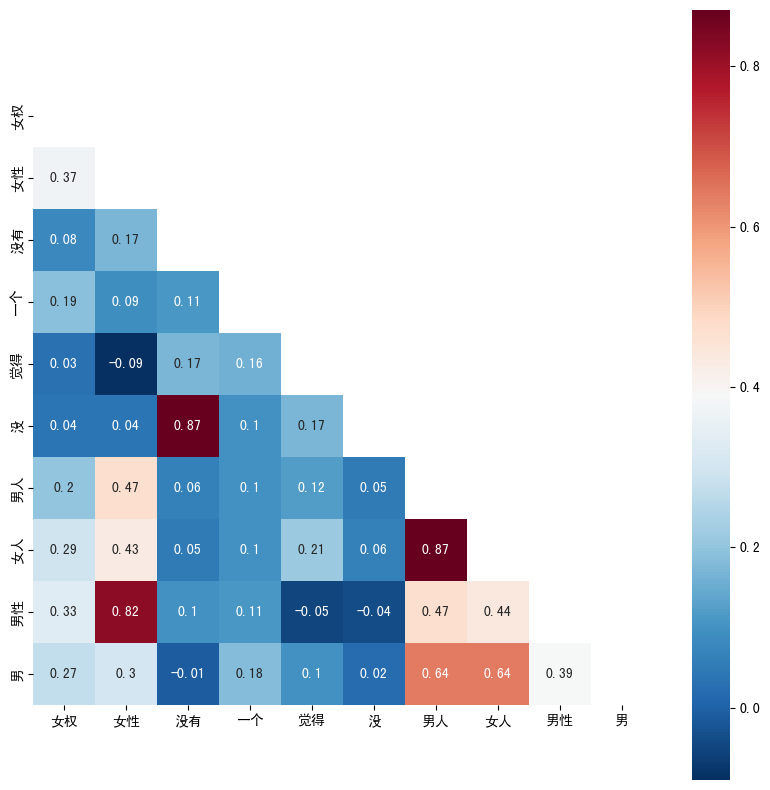

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=sim_df.round(2),square=True,cmap="RdBu_r",annot=True, mask = mask)